In [3]:
from __future__ import division
from collections import Counter
from linear_algebra import distance
from statistics import mean
import math, random
import matplotlib.pyplot as plt

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda (point, _): distance(point, new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

In [4]:
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
from sklearn import neighbors

sns.set(style="white")
sns.set_context({"figure.figsize": (24, 10)})

pd.options.display.float_format = '{:.2f}'.format

abb_link = './tfg/dbases/development3.csv'
zc_link = './tfg/mapas/barrios_area.shp'

muestra = pd.read_csv(abb_link)
barrios = gpd.read_file(zc_link)

geometry = [Point(xy) for xy in zip(muestra['lon'], muestra['lat'])]
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(muestra, crs=crs, geometry=geometry)

db = gpd.sjoin(geo_df, barrios, how="inner", op='intersects')

metro = pd.read_csv('../../tfg/dbases/distance_matrix_metro.csv')

db = db.join(metro.set_index('InputID'),
                            on='id', how='left')

db = db.rename(index=str, columns={"DESBDT": "subdistrict_f", "Distance": "metro_distance", "NUMPOINTS": "metro_number"})

db = pd.DataFrame(db)
db['floor']=db['floor'].replace(['Ground floor', 'Mezzanine', 'Semi-basement', 'Basement', 'ground', 'Floor -2', 'Floor -1'], 0,regex=True)
#db.replace(u'\xe', 'A')
db['floor'] = pd.to_numeric(db['floor'])

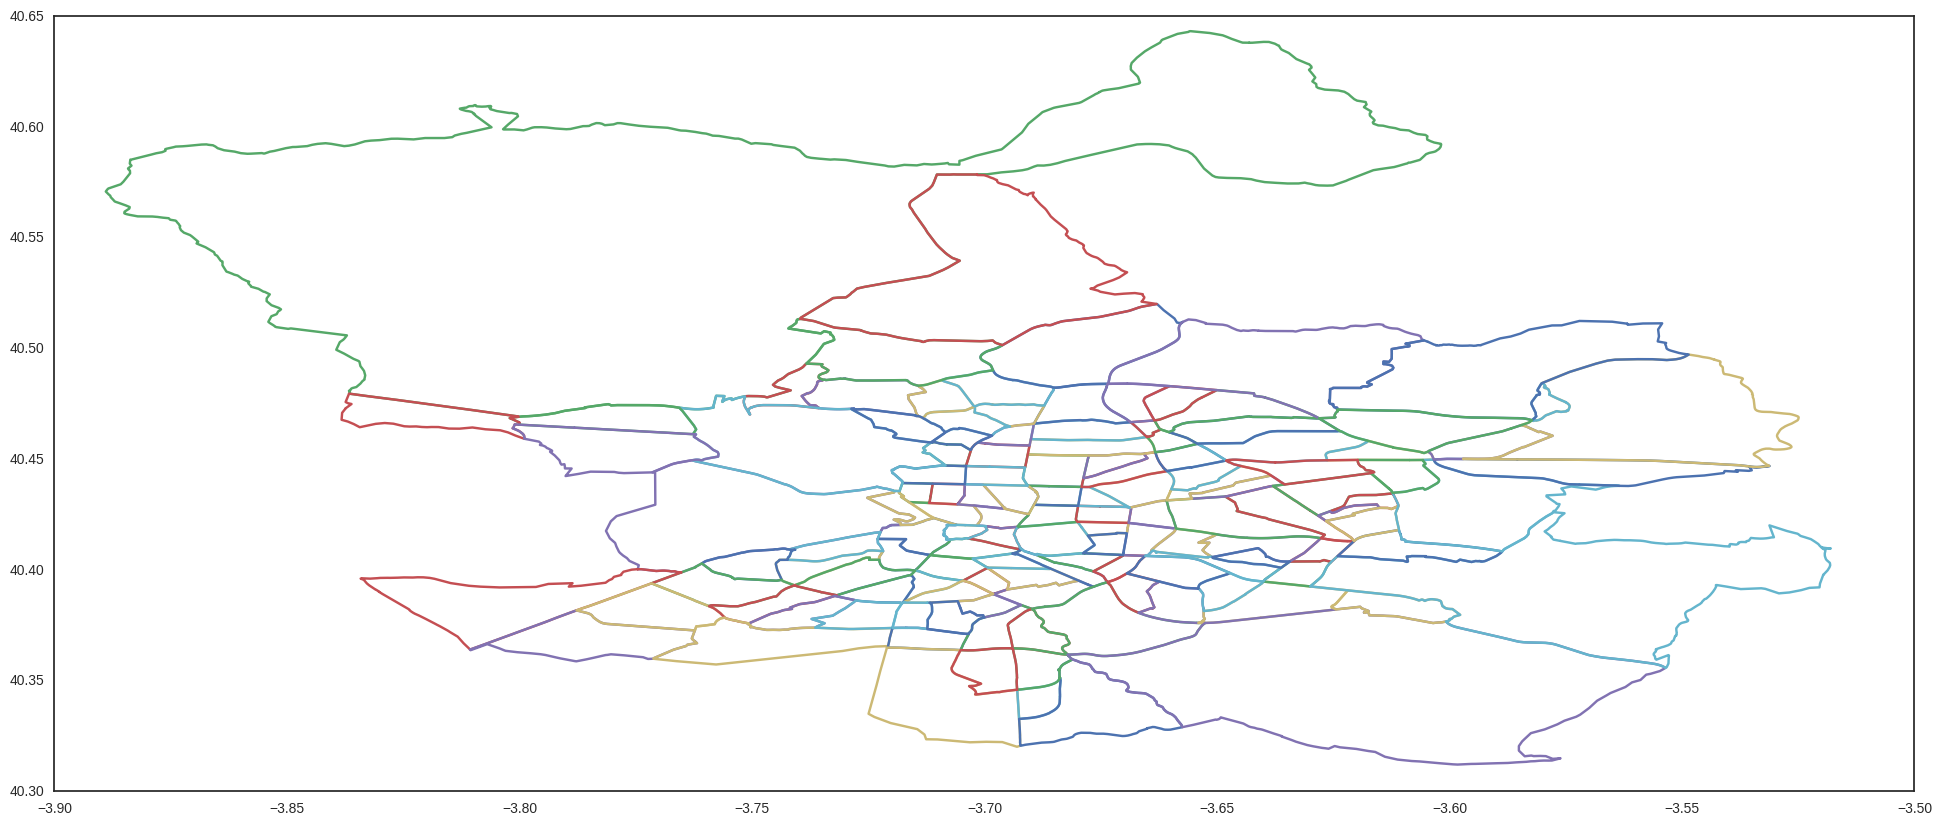

In [5]:
import shapefile as shp
import matplotlib.pyplot as plt

sf = shp.Reader('../../tfg/mapas/barrios_area.shp')
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [6]:
db1 = db[(db["share_loc"] == 1) & (db["district"] == ' Moratalaz ') ]

In [6]:
db1.loc[:,['lon', 'lat']].describe()

,lon,lat
count,134.00,134.00
mean,-3.64,40.41
std,0.01,0.00
min,-3.66,40.40
25%,-3.65,40.40
50%,-3.64,40.41
75%,-3.64,40.41
max,-3.63,40.42


In [7]:
bins = [400, 2000, 2750, 3630, 16200]

In [8]:
group_names = ['400 - 2000', '2001 - 2750', '2751 - 3630', '3631 - 16200']

In [9]:
db1['pricems_disc'] = pd.cut(db1['pricems'], bins, labels=group_names)
#db1.loc[:,['pricems', 'pricems_disc', 'lat', 'lon']]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
for index, row in db1.iterrows():
   print row['lon'], row['lat']

-3.73093 40.4296999
-3.7299488 40.4251062
-3.7313987 40.4302931
-3.7341465 40.4275217
-3.7261981 40.423314
-3.7326166 40.4309927
-3.7336081 40.4327051
-3.7336699 40.4320654
-3.7309005 40.4260849
-3.7268884 40.425878
-3.7275813 40.4265015
-3.7317643 40.4310651
-3.7336081 40.4327051
-3.7296898 40.4263838
-3.7326859 40.4275019
-3.72787 40.4248572
-3.72914 40.4275499
-3.7275813 40.4265015
-3.6675506 40.4582956
-3.678151 40.4546586
-3.6869477 40.4562851
-3.6814584 40.4558222
-3.6836688 40.4540791
-3.6799232 40.4559418
-3.6710613 40.4582465
-3.6806664 40.4559248
-3.677905 40.4554729
-3.6851113 40.4524786
-3.6773371 40.4563165
-3.6855816 40.4576817
-3.6868009 40.4578461
-3.6743445 40.4534127
-3.6809399 40.4569848
-3.6807682 40.4541873
-3.6866322 40.4585379
-3.6814828 40.4551176
-3.6780591 40.4551219
-3.6811877 40.4534868
-3.6767114 40.4558621
-3.67506 40.45779
-3.67873 40.4543084
-3.6786384 40.4538076
-3.6814974 40.4554654
-3.6875943 40.4585151
-3.6709209 40.4554795
-3.6836688 40.4540791
-3.6

In [10]:
cities = []
for index, row in db1.loc[:,['lon', 'lat', 'pricems_disc']].iterrows():
    cities.append(([row["lon"], row["lat"]], row["pricems_disc"]))

In [168]:
cities

[([-3.6359464999999997, 40.407262100000004], '400 - 2000'),
 ([-3.6324791, 40.40689570000001], '2001 - 2750'),
 ([-3.630486, 40.410588399999995], '2751 - 3630'),
 ([-3.6361061, 40.405421999999994], '2751 - 3630'),
 ([-3.6328722, 40.409544399999994], '2001 - 2750'),
 ([-3.6357987, 40.4088277], '2751 - 3630'),
 ([-3.6434453999999996, 40.4100383], '2751 - 3630'),
 ([-3.6506542, 40.406048999999996], '2001 - 2750'),
 ([-3.6377574, 40.4073927], '2751 - 3630'),
 ([-3.6489095999999996, 40.4113506], '2001 - 2750'),
 ([-3.6356077000000004, 40.4098351], '2751 - 3630'),
 ([-3.6477136, 40.411867799999996], '2001 - 2750'),
 ([-3.6356381, 40.4103403], '2001 - 2750'),
 ([-3.6310302000000005, 40.410163700000005], '2001 - 2750'),
 ([-3.6351199999999997, 40.40866], '2001 - 2750'),
 ([-3.6361061, 40.405421999999994], '400 - 2000'),
 ([-3.6308479, 40.4091924], '2001 - 2750'),
 ([-3.6453201, 40.4113079], '400 - 2000'),
 ([-3.647928, 40.407850700000004], '2001 - 2750'),
 ([-3.6491843999999998, 40.409638], '4

In [11]:
def plot_cities():

    
    plots = { "400 - 2000" : ([], []), "2001 - 2750" : ([], []), "2751 - 3630" : ([], []), "3631 - 16200" : ([], []) }

    
    markers = { "400 - 2000" : "s", "2001 - 2750" : "s", "2751 - 3630" : "s", "3631 - 16200" : "s" }
    colors  = {"400 - 2000" : "r", "2001 - 2750" : "b", "2751 - 3630" : "k", "3631 - 16200" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each bin
    for language, (x, y) in plots.iteritems():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s = 250)

    
    for shape in sf.shapeRecords():
      x = [i[0] for i in shape.shape.points[:]]
      y = [i[1] for i in shape.shape.points[:]]
      plt.plot(x,y)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2,  borderaxespad=0.)         # let matplotlib choose the location
    plt.axis([-3.67,-3.62,40.39,40.42]) # set the axes
    plt.title("Precio real por metro cuadrado")
    plt.show()


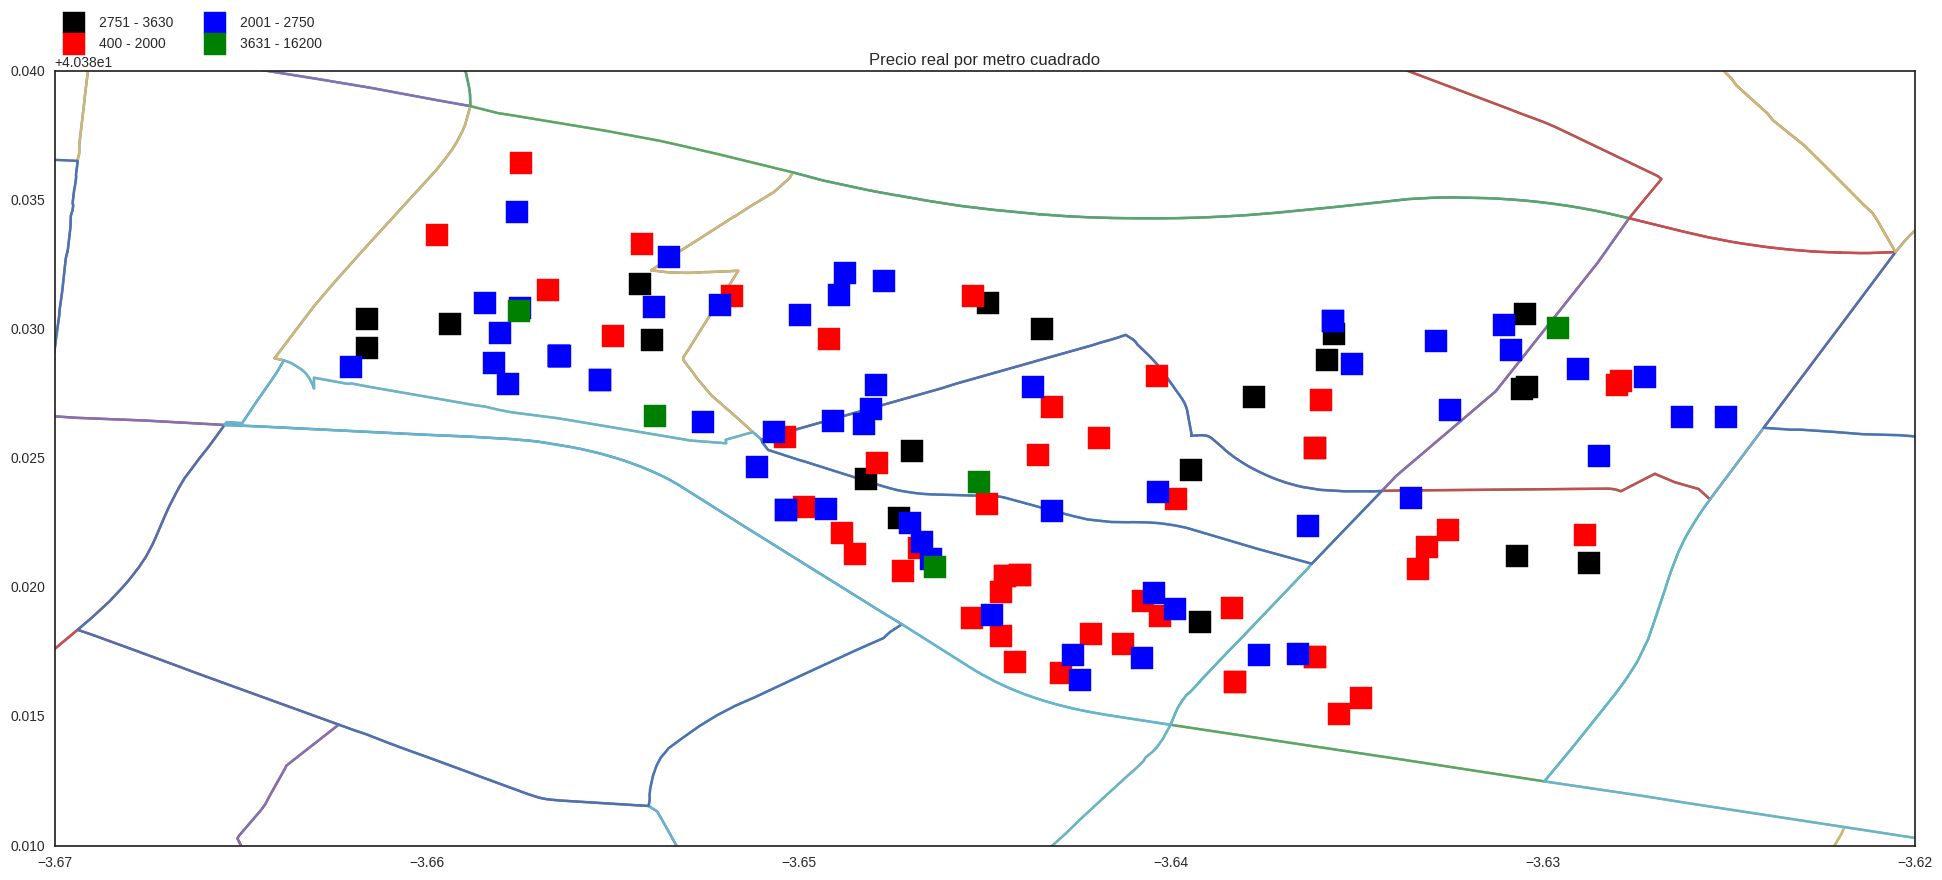

In [12]:
plot_cities()

In [18]:

def classify_and_plot_grid(k=1):
    plots = { "400 - 2000" : ([], []), "2001 - 2750" : ([], []), "2751 - 3630" : ([], []), "3631 - 16200" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "400 - 2000" : "s", "2001 - 2750" : "s", "2751 - 3630" : "s", "3631 - 16200" : "s" }
    colors  = {"400 - 2000" : "r", "2001 - 2750" : "b", "2751 - 3630" : "k", "3631 - 16200" : "g" }

    for longitude in np.arange(db1["lon"].min(),db1["lon"].max(), 0.001):
        for latitude in np.arange(db1["lat"].min(),db1["lat"].max(), 0.001):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.iteritems():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0, s = 150)

    for shape in sf.shapeRecords():
      x = [i[0] for i in shape.shape.points[:]]
      y = [i[1] for i in shape.shape.points[:]]
      plt.plot(x,y)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2,  borderaxespad=0.)           # let matplotlib choose the location
    plt.axis([-3.67,-3.62,40.39,40.42]) # set the axes
    plt.title("Precio estimado mediante %s KNN"  %k)
    plt.show()

#

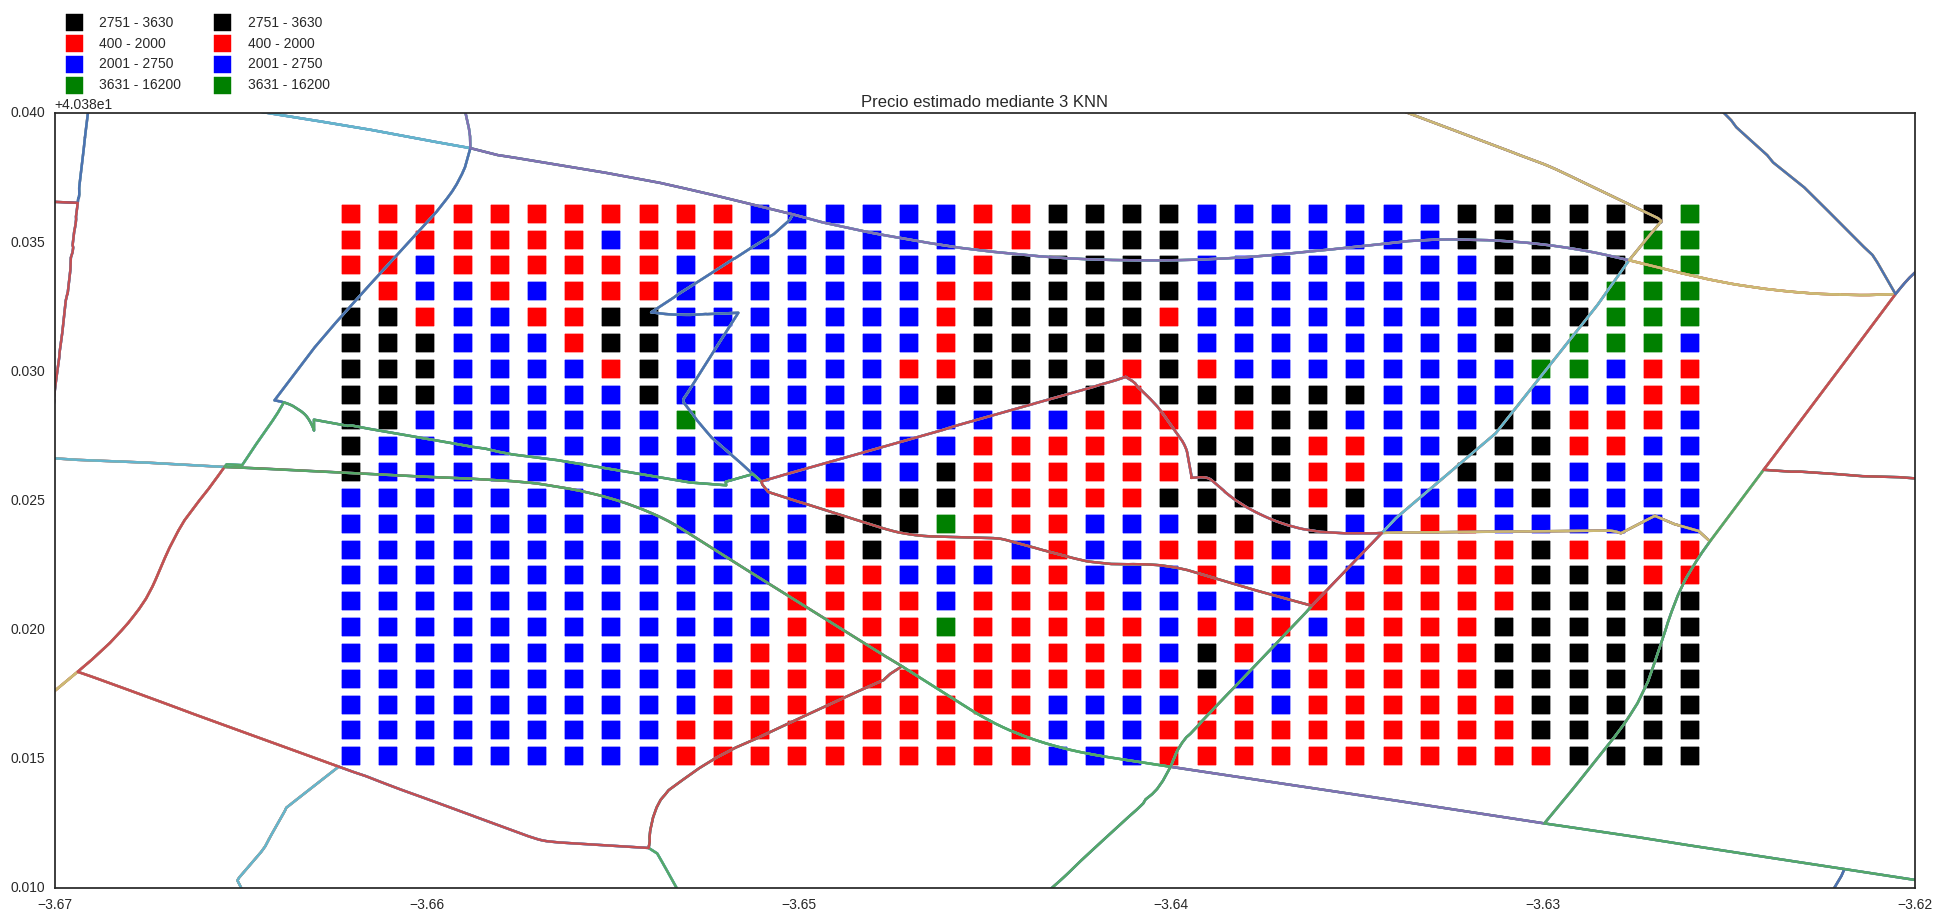

In [19]:
classify_and_plot_grid(3)

In [67]:
range(3, 8)

[3, 4, 5, 6, 7]

In [79]:
len(np.arange(-3.8,-3.54, 0.01))

26

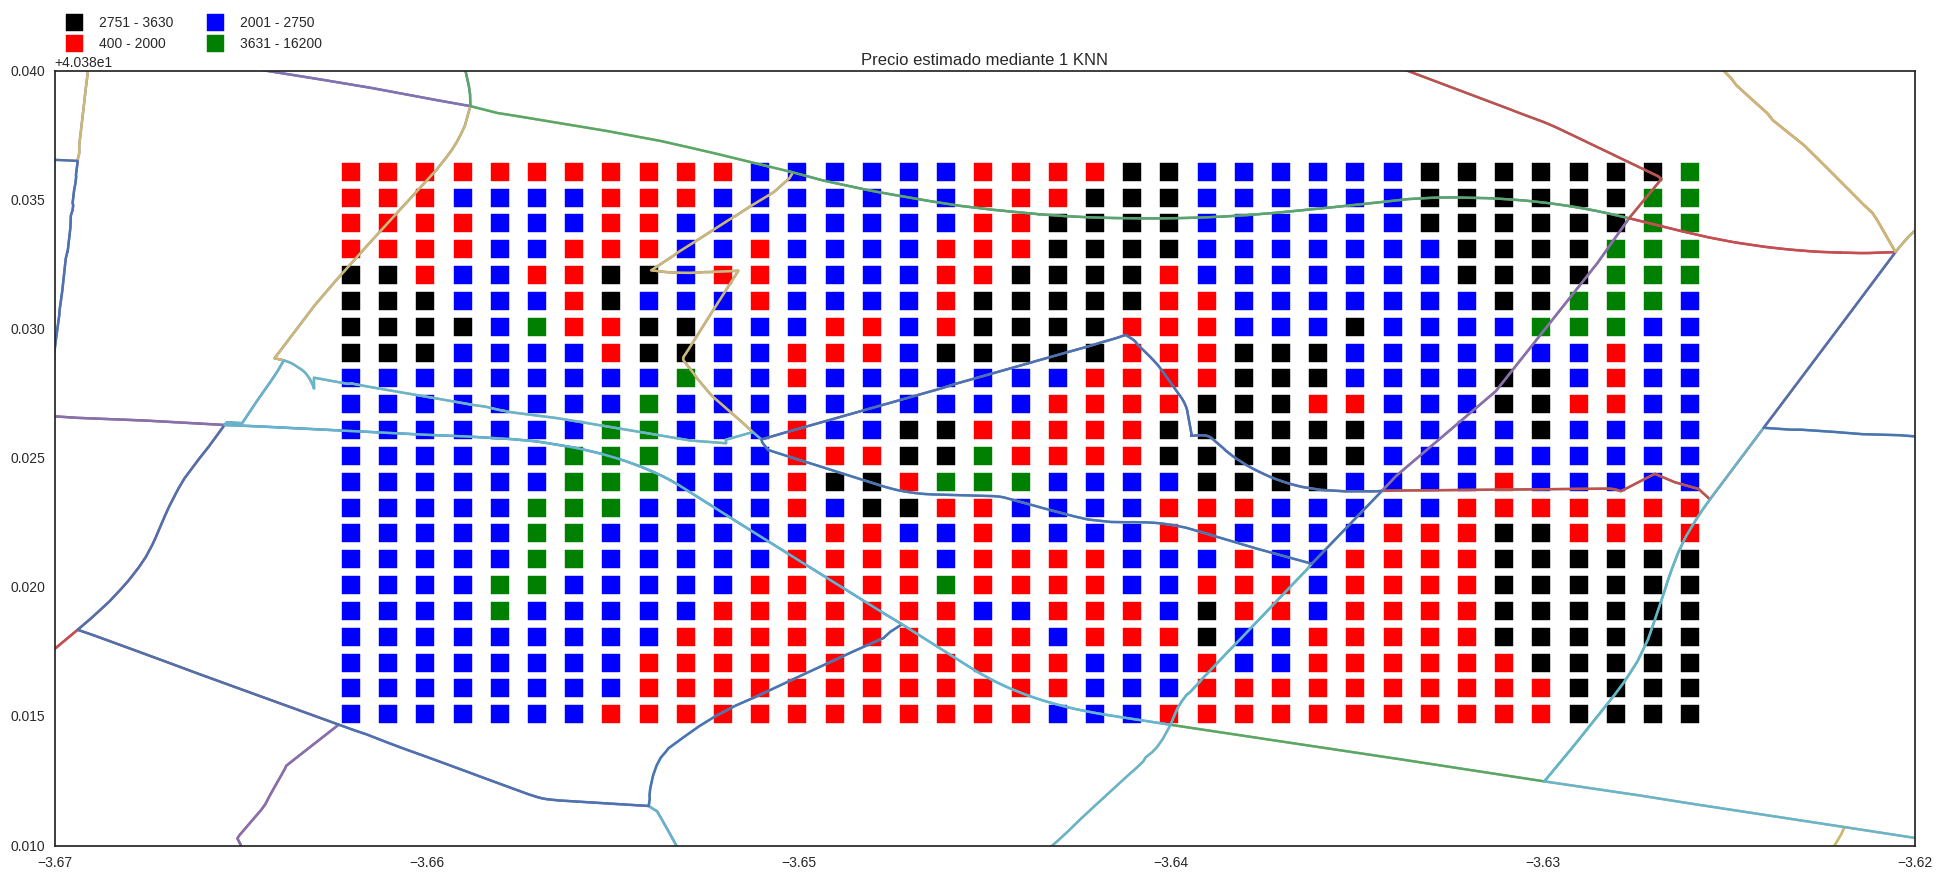

In [20]:
classify_and_plot_grid(1)

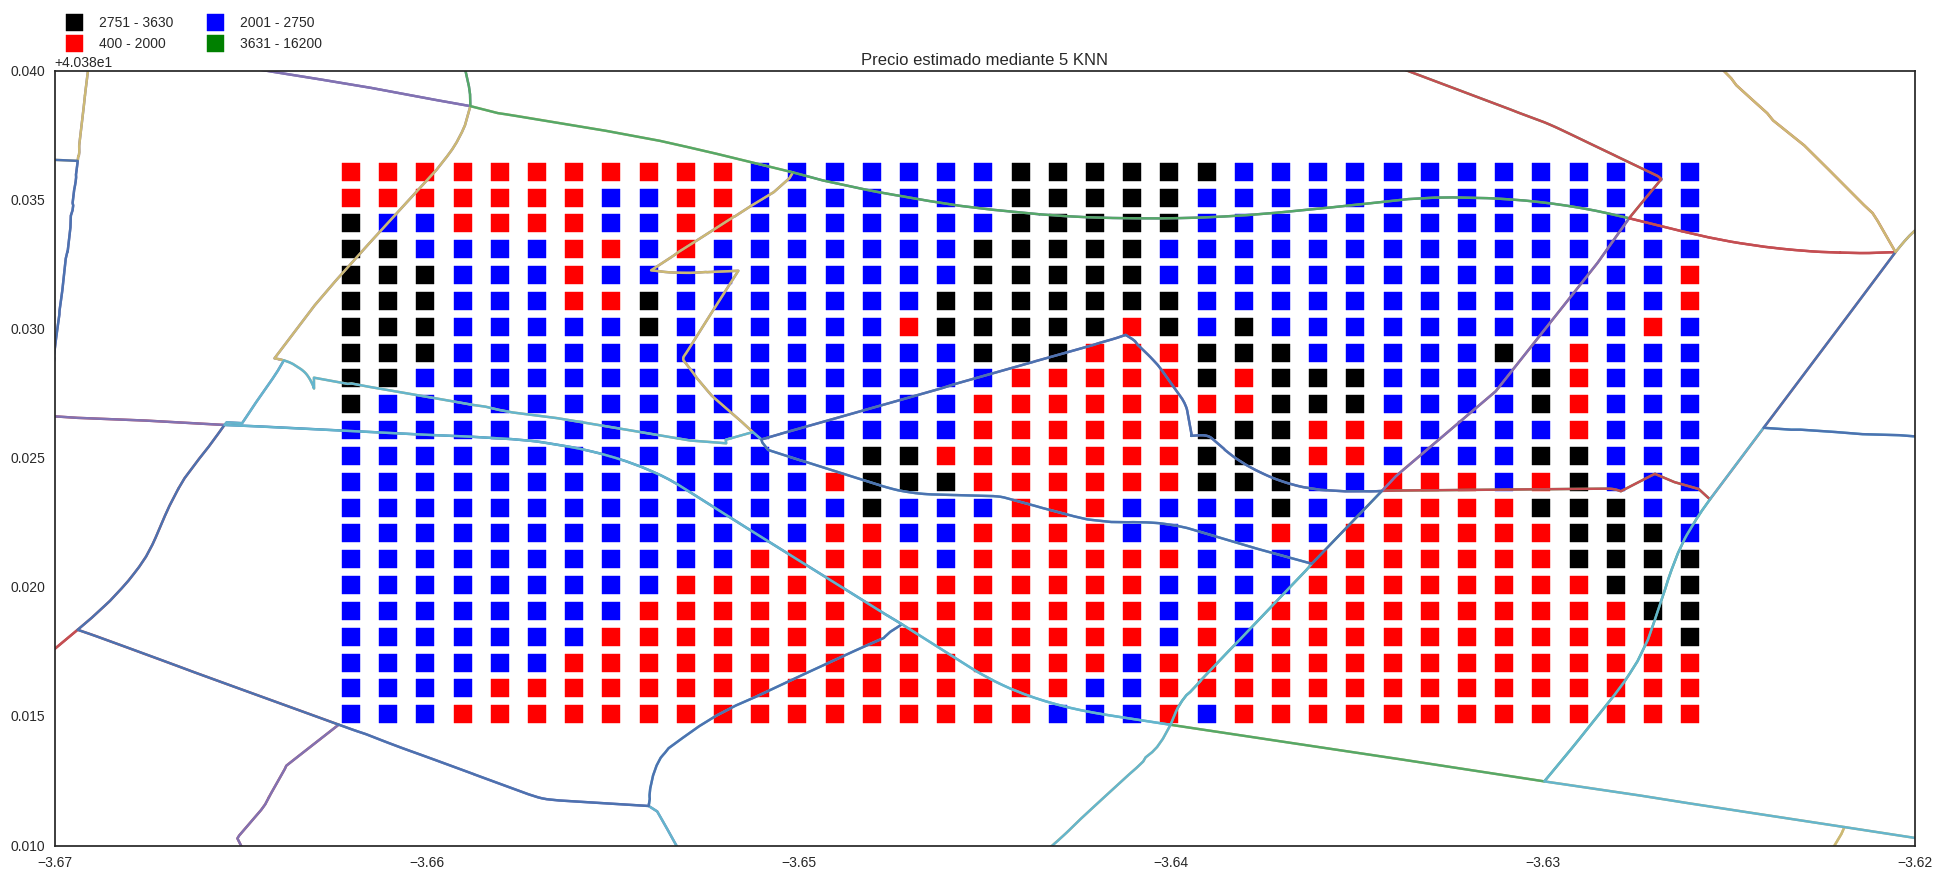

In [21]:
classify_and_plot_grid(5)

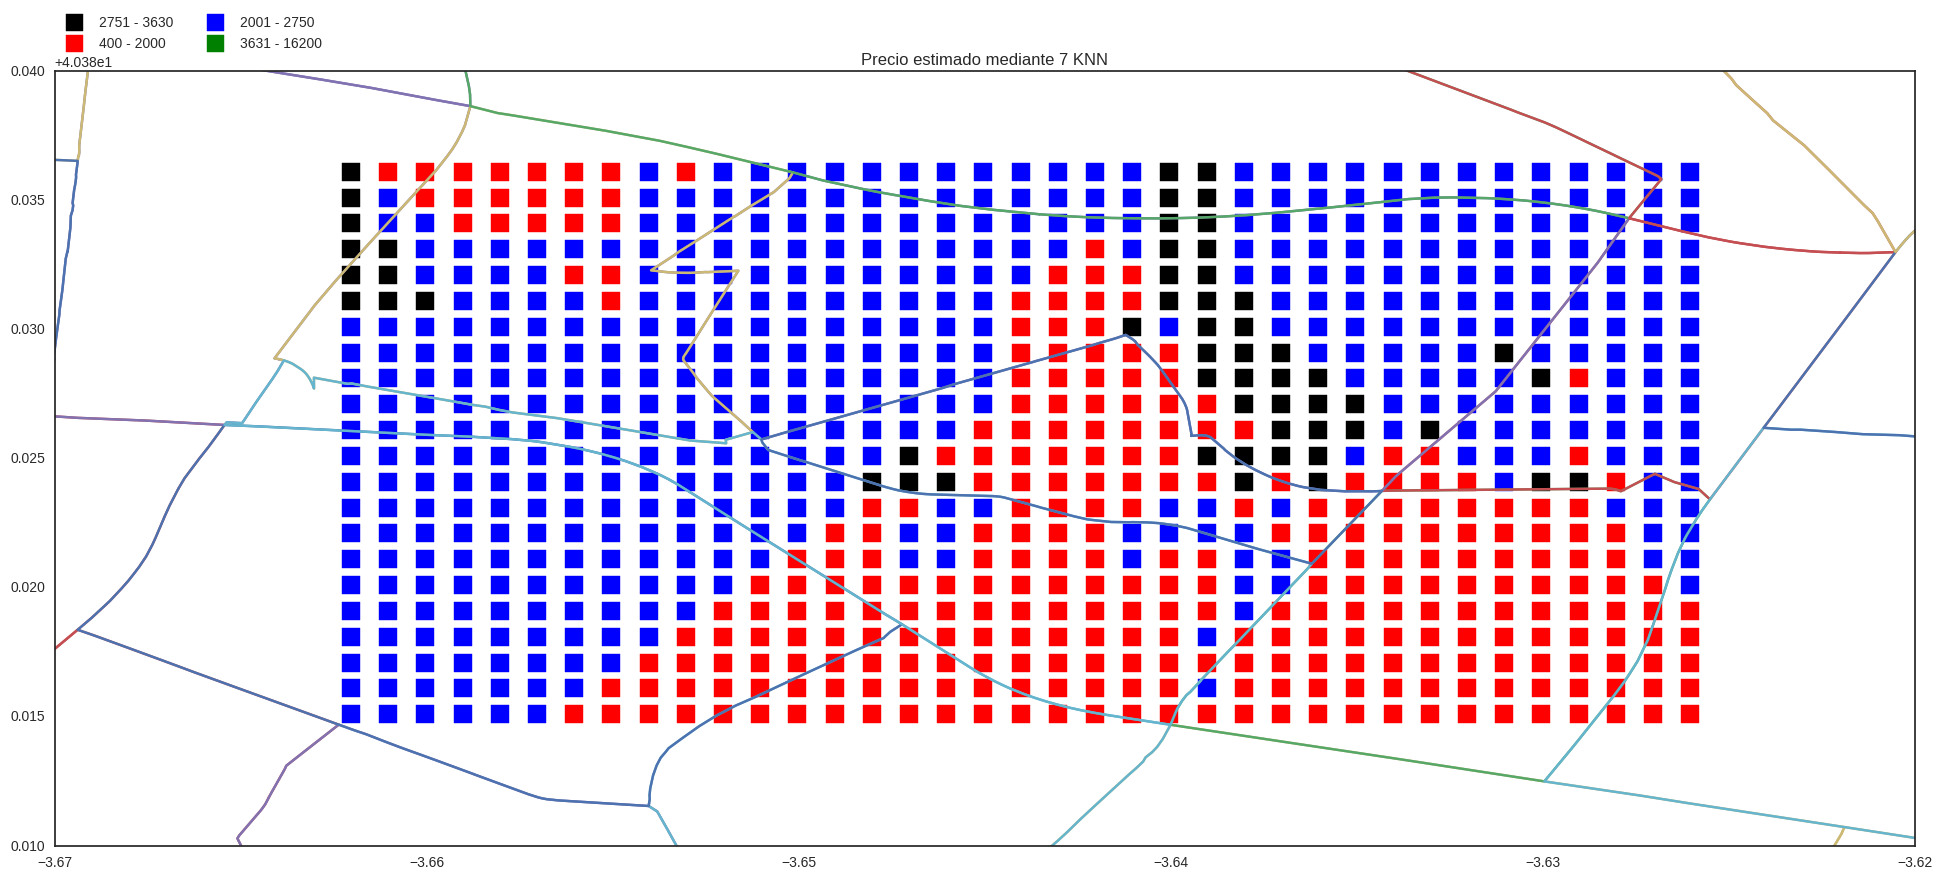

In [22]:
classify_and_plot_grid(7)